In [1]:
import skimage.io as skio
import skimage.transform as skit
import skimage.exposure as skie
import numpy as np
import pulse2percept as p2p

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
def combine_imgs(imgfile1, imgfile2):
    img1 = skie.rescale_intensity(skio.imread(imgfile1, dtype=np.float32))
    img2 = skie.rescale_intensity(skio.imread(imgfile2, dtype=np.float32))
    if img1.shape[0] < img2.shape[0]:
        img2 = skit.resize(img2, img1.shape, mode='reflect')
    else:
        img1 = skit.resize(img1, img2.shape, mode='reflect')
    return np.concatenate((img1, img2), axis=1), img1, img2

In [597]:
subject = '52-001'
fbase = '/home/mbeyeler/data/secondsight/fundus/52-001/52-001-20090429-2OD-Fundus_Baseline_HDR.jpg'
fm24 = '/home/mbeyeler/data/secondsight/fundus/52-001/52-001-20090903-15OD-Fundus_3Months_HDR.jpg'

In [4]:
img_combined, img1, img2 = combine_imgs(fbase, fm24)

In [16]:
img1_warped = img_combined[:, :img_combined.shape[1] // 2, :]

<IPython.core.display.Javascript object>


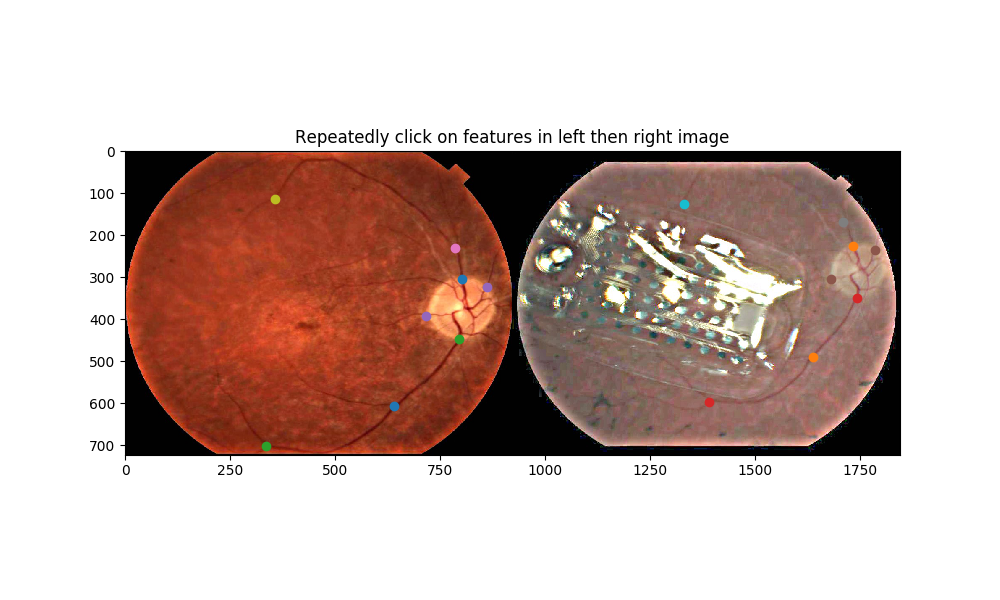

In [6]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.imshow(img_combined)
ax1.set_title('Repeatedly click on features in left then right image')
collector = []

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    collector.append((event.ydata, event.xdata))
    ax1.plot(event.xdata, event.ydata, 'o')
    text.set_text(tx)
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [7]:
collector

[(304.50346774193565, 801.98895161290307),
 (225.8995967741937, 1733.3257258064516),
 (447.41959677419368, 794.84314516129029),
 (349.76024193548403, 1742.8534677419354),
 (323.55895161290334, 861.53733870967744),
 (235.42733870967754, 1785.728306451613),
 (230.66346774193562, 785.31540322580645),
 (168.73314516129051, 1709.5063709677418),
 (113.94862903225828, 356.56701612903225),
 (125.85830645161309, 1330.7786290322581),
 (607.00927419354844, 640.01733870967735),
 (490.29443548387098, 1638.0483064516129),
 (702.28669354838712, 335.12959677419349),
 (597.48153225806459, 1390.3270161290322),
 (392.63508064516145, 716.23927419354834),
 (304.50346774193565, 1680.9231451612902)]

In [65]:
pts_source = np.array(collector[::2])
pts_target = np.array(collector[1::2])
pts_target[:, 1] -= img1_warped.shape[1]

In [70]:
tf = skit.estimate_transform('projective', np.fliplr(pts_target), np.fliplr(pts_source))

In [74]:
img2_warped = skit.warp(img2, inverse_map=tf.inverse,
                        output_shape=img1_warped.shape)

In [75]:
mask = (img1_warped != 0) & (img2_warped != 0)

In [76]:
registered = img1_warped + img2_warped
registered[mask] /= 2

<IPython.core.display.Javascript object>


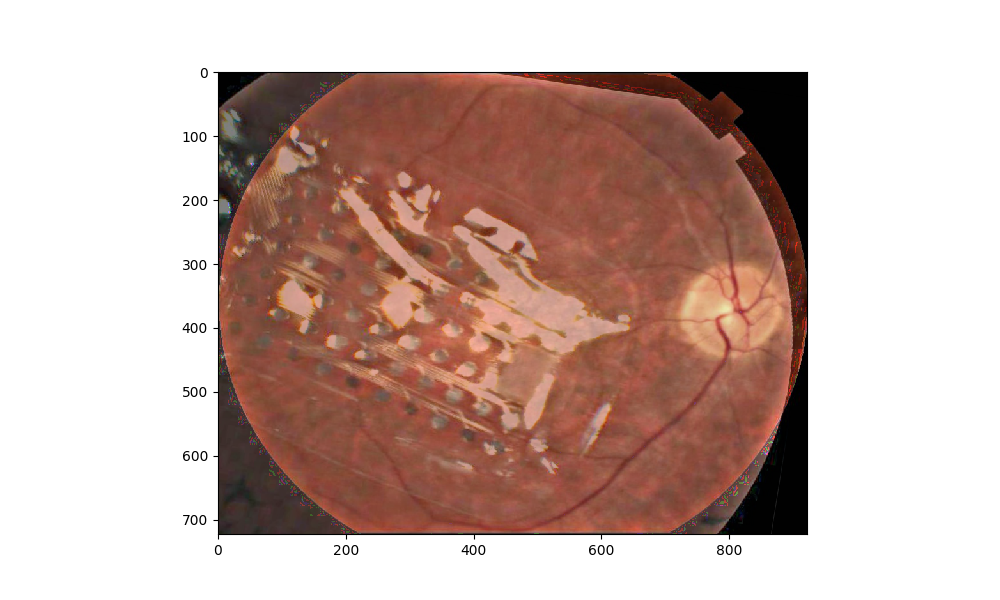

In [604]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.imshow(registered)
fig.savefig('%s-registered.png' % subject)

<IPython.core.display.Javascript object>


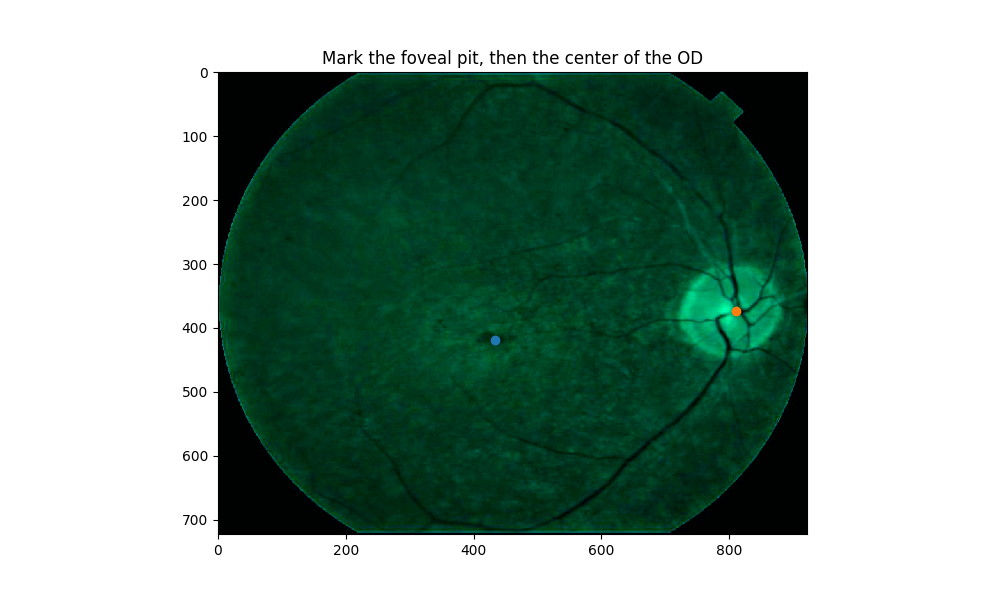

In [157]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.imshow(img1_warped)
ax1.set_title('Mark the foveal pit, then the center of the OD')
collector = []

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    collector.append((event.ydata, event.xdata))
    ax1.plot(event.xdata, event.ydata, 'o')
    text.set_text(tx)
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [158]:
foveal_pit = collector[0]
optic_disc = collector[1]
foveal_pit, optic_disc

((418.9515016233766, 433.46692370129864),
 (373.56838474025972, 810.61627435064929))

<IPython.core.display.Javascript object>


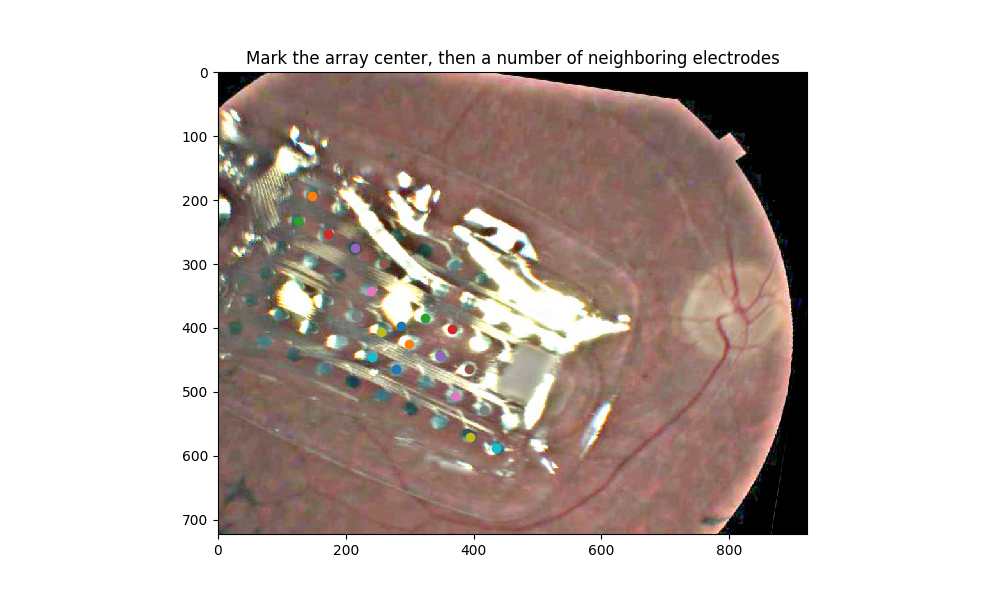

In [119]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.imshow(img2_warped)
ax1.set_title('Mark the array center, then a number of neighboring electrodes')
# ax1.text(0, 0, 'base image', color='w',
#          horizontalalignment='left',
#          verticalalignment='top')
collector = []

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    collector.append((event.ydata, event.xdata))
    ax1.plot(event.xdata, event.ydata, 'o')
    text.set_text(tx)
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [120]:
arr_center = collector[0]
eloc = np.array(collector[1:])

In [121]:
eldist = np.mean(np.sqrt(np.diff(eloc[:, 0]) ** 2 + np.diff(eloc[:, 1]) ** 2))
eldist

46.771780953580361

<IPython.core.display.Javascript object>


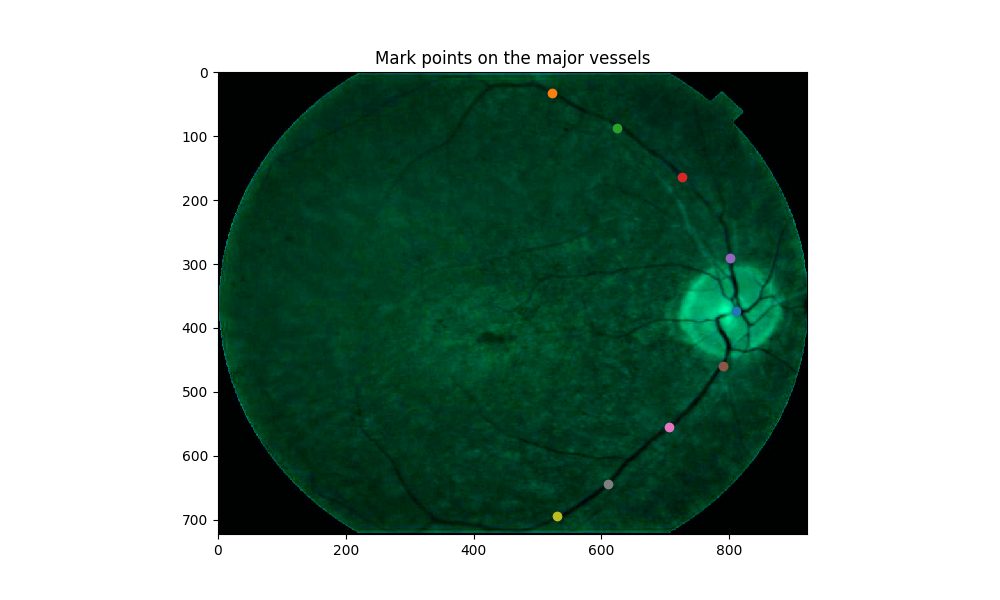

In [506]:
fig = plt.figure(figsize=(10, 6))
ax11 = fig.add_subplot(111)
ax11.imshow(img1_warped)
ax11.plot(optic_disc[1], optic_disc[0], 'o')
ax11.set_title('Mark points on the major vessels')
# ax1.text(0, 0, 'base image', color='w',
#          horizontalalignment='left',
#          verticalalignment='top')
collector = []

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    collector.append((event.xdata, event.ydata))
    ax11.plot(event.xdata, event.ydata, 'o')
    text.set_text(tx)
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [507]:
vertex = optic_disc[::-1]
vessel = collector
vessel

[(522.66822240259739, 32.31473214285711),
 (624.38900162337654, 87.087459415584362),
 (726.10978084415569, 163.76927759740261),
 (801.22666396103887, 290.52901785714278),
 (790.27211850649337, 459.5420048701298),
 (705.76562499999977, 555.00304383116872),
 (610.30458603896091, 644.20434253246754),
 (530.49289772727275, 694.28226461038957)]

In [508]:
def rmse(x, pts, vertex):
    a, theta = x
    mse = 0
    for p in pts:
        y = (p[0] - vertex[0]) * np.sin(theta) + (p[1] - vertex[1]) * np.cos(theta)
        x = (p[0] - vertex[0]) * np.cos(theta) - (p[1] - vertex[1]) * np.sin(theta)
        mse += (a * y ** 2 - x) ** 2
    return np.sqrt(mse)

In [509]:
from scipy.optimize import minimize
ret = minimize(rmse, [0, 0], args=(vessel, vertex), method='Nelder-Mead')
ret

 final_simplex: (array([[-0.00255001, -0.02695977],
       [-0.00255034, -0.02686884],
       [-0.00255069, -0.026959  ]]), array([ 29.34379579,  29.34381636,  29.34387512]))
           fun: 29.343795793270971
       message: 'Optimization terminated successfully.'
          nfev: 126
           nit: 66
        status: 0
       success: True
             x: array([-0.00255001, -0.02695977])

In [510]:
best_a, best_theta = ret['x']
best_raphe = np.array([-np.cos(best_theta), np.sin(best_theta)])
best_a, np.rad2deg(best_theta)

(-0.0025500140887452869, -1.5446809089179316)

In [511]:
def find_x(pt_x, pt_y, vertex, a, theta):
    y = (pt_x - vertex[0]) * np.sin(theta) + (pt_y - vertex[1]) * np.cos(theta)
    x = (pt_x - vertex[0]) * np.cos(theta) - (pt_y - vertex[1]) * np.sin(theta)
    return (a * y ** 2 - x) ** 2

In [516]:
y_para = np.linspace(50, 680, 31)
x_para = []
for yy in y_para:
    r = minimize(find_x, 0, args=(yy, vertex, best_a, best_theta), method='Nelder-Mead')
    x_para.append(r['x'][0])

In [517]:
def dist(p, l1, l2):
    x0, y0 = p
    x1, y1 = l1
    x2, y2 = l2
    numer = np.abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denom = np.sqrt((y2-y1)**2 + (x2-x1)**2)
    return numer / denom

In [518]:
proj_foveal_pit = dist(foveal_pit[::-1], vertex, vertex + best_raphe) * np.array([-best_raphe[1], best_raphe[0]])
proj_foveal_pit += foveal_pit[::-1]

<IPython.core.display.Javascript object>


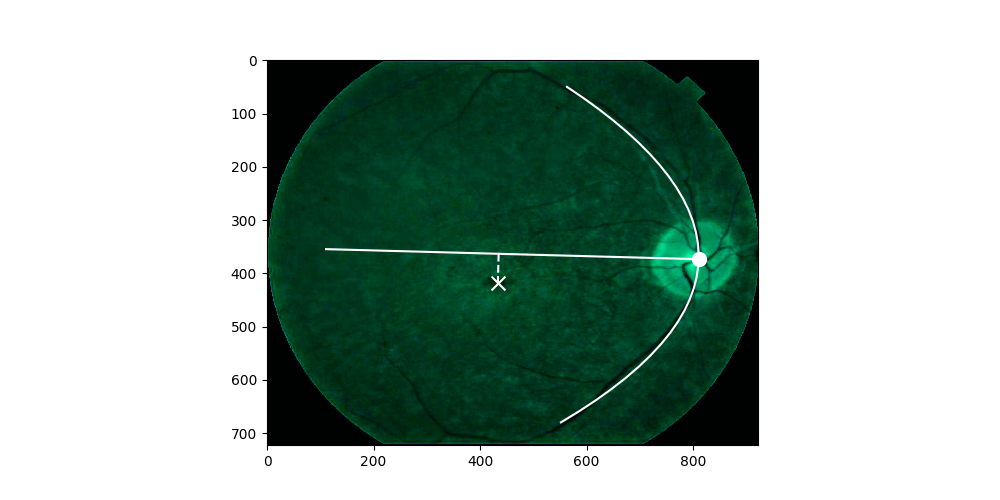

In [601]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.imshow(img1_warped, cmap='gray')
ax.plot(x_para, y_para, 'w')
ax.plot([vertex[0], vertex[0] + 700 * best_raphe[0]],
        [vertex[1], vertex[1] + 700 * best_raphe[1]], 'w')
ax.scatter(vertex[0], vertex[1], c='w', s=100, marker='o')
ax.scatter(foveal_pit[1], foveal_pit[0], c='w', s=100, marker='x')
ax.plot([proj_foveal_pit[0], foveal_pit[1]], [proj_foveal_pit[1], foveal_pit[0]], 'w--')
plt.savefig('%s-raphe-fovea.png' % subject)

In [525]:
euclid = skit.EuclideanTransform(rotation=best_theta)

In [548]:
rf_foveal_pit = euclid(foveal_pit[::-1])[0]
rf_proj_foveal_pit = euclid(proj_foveal_pit)[0]
rf_vertex = euclid(vertex)[0]
rf_arr_center = euclid(arr_center[::-1])[0]
rf_eloc = euclid(np.fliplr(eloc))

In [549]:
x_px = np.sqrt((vertex[0] - proj_foveal_pit[0]) ** 2 + (vertex[1] - proj_foveal_pit[1]) ** 2)
y_px = np.sqrt((proj_foveal_pit[0] - foveal_pit[1]) ** 2 + (proj_foveal_pit[1] - foveal_pit[0]) ** 2)

rf_x_px = np.sqrt((rf_vertex[0] - rf_proj_foveal_pit[0]) ** 2 + (rf_vertex[1] - rf_proj_foveal_pit[1]) ** 2)
rf_y_px = np.sqrt((rf_proj_foveal_pit[0] - rf_foveal_pit[0]) ** 2 + (rf_proj_foveal_pit[1] - rf_foveal_pit[1]) ** 2)

assert np.isclose(x_px, rf_x_px)
assert np.isclose(y_px, rf_y_px)

In [557]:
export_loc_od = p2p.retina.ret2dva(x_px / eldist * 525), p2p.retina.ret2dva(y_px / eldist * 525)
print('Center of optic nerve head in deg from the foveal pit:')
export_loc_od

Center of optic nerve head in deg from the foveal pit:


(15.609559078040428, 2.2381648328706558)

In [556]:
print('Array center in um from the foveal pit:')
export_arr_center = (rf_arr_center - rf_foveal_pit) * np.array([525 / eldist, -525 / eldist])
export_arr_center

Array center in um from the foveal pit:


array([-1657.11040863,   196.93351877])

In [553]:
angles = []
for j in range(1, rf_eloc.shape[0]):
    v1 = rf_eloc[j - 1, :] - rf_eloc[j, :]
    v2 = [1, 0]
    angle = np.rad2deg(np.arccos(np.dot(v1, v2) / np.linalg.norm(v1) / np.linalg.norm(v2)))
    if angle > 90:
        angle = 180 - angle
    if angle > 45:
        angle = 90 - angle
    angles.append(angle)
angles

[27.704145427628987,
 21.884011899827414,
 25.862894528900455,
 25.80519487115194,
 23.360087899177188,
 29.41907562315567,
 31.074562162274816,
 18.254195445606868,
 25.020370268160121,
 25.929750717359312,
 30.062821337330902,
 20.621664913164551,
 22.417808065660196,
 22.600861051503756,
 25.862894528900497,
 24.224646715420761,
 25.862894528900583,
 21.38741952867187]

In [563]:
print('Array orientation in rad and deg:')
export_rot = -np.deg2rad(np.mean(angles))
export_rot, np.rad2deg(export_rot)

Array orientation in rad and deg:


(-0.43376793904131516, -24.853072195155328)

In [564]:
argus = p2p.implants.ArgusII(x_center=export_arr_center[0],
                             y_center=export_arr_center[1],
                             rot=export_rot)

2017-11-14 15:24:35,586 [pulse2percept.implants] [WARNING] Distance to fovea=4352 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-11-14 15:24:35,588 [pulse2percept.implants] [WARNING] Distance to fovea=3882 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-11-14 15:24:35,590 [pulse2percept.implants] [WARNING] Distance to fovea=3428 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-11-14 15:24:35,593 [pulse2percept.implants] [WARNING] Distance to fovea=4159 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-11-14 15:24:35,594 [pulse2percept.implants] [WARNING] Distance to fovea=3664 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-11-14 15:24:35,596 [pulse2percept.implants] [WARNING] Distance to fovea=3179 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.
2017-11-14 15:24:35,598 [pulse2percept.implants] [WARNING] Distance to

In [565]:
sim = p2p.Simulation(argus)

In [566]:
sim.set_optic_fiber_layer(sampling=506, loc_od=export_loc_od)

2017-11-14 15:24:37,271 [pulse2percept.retina] [INFO] Loading file "./retina_RE_s506_a501_r801_7000x5500.npz".


In [591]:
sim.ofl.x_range

(-5000.0, 2000.0)

<IPython.core.display.Javascript object>


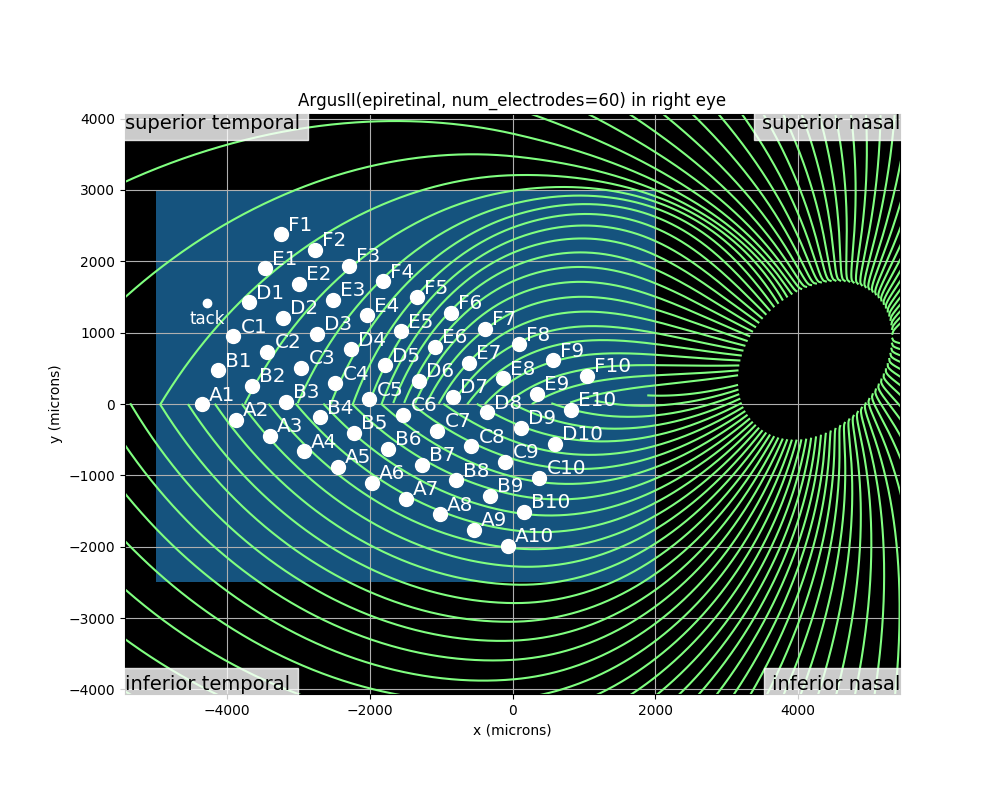

In [598]:
fig, ax = sim.plot_fundus()
ax.grid('on', which='major')
fig.savefig('%s-sim.png' % subject)

In [568]:
rf_img = skit.warp(registered, euclid.inverse)

<IPython.core.display.Javascript object>


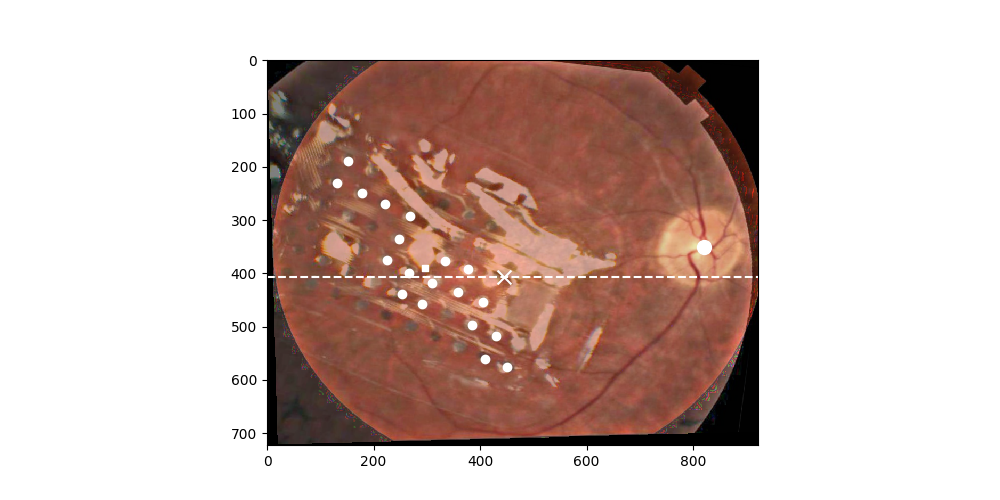

In [602]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.imshow(rf_img, cmap='gray')
ax.plot(rf_eloc[:, 0], rf_eloc[:, 1], 'ow')
ax.scatter(rf_vertex[0], rf_vertex[1], c='w', s=100, marker='o')
ax.scatter(rf_foveal_pit[0], rf_foveal_pit[1], c='w', s=100, marker='x')
ax.scatter(rf_arr_center[0], rf_arr_center[1], c='w', s=20, marker='s')
ax.plot([0, registered.shape[1] - 1], [rf_foveal_pit[1], rf_foveal_pit[1]], 'w--')
fig.savefig('%s-registered-annot.png' % subject)